In [3]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from math import sqrt


In [4]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

TRAIN_SIZE = 0.75

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = TRAIN_SIZE)

In [5]:
n_estimators = 50
params = {'n_estimators': n_estimators, 'max_depth': 4, 'random_state': 42, 'learning_rate': 0.9}
regr = LinearRegression() 
clf = GradientBoostingRegressor(**params)

In [6]:
for i in range(n_estimators):
    clf.learning_rate = 0.9/(i+1.0)
    clf.fit(X_train, y_train)
    mse = mean_squared_error(y_test, clf.predict(X_test))
    mse = sqrt(mse)
    print("RMSE Gradient: %.4f" % mse)


regr.fit(X_train, y_train)
mse = mean_squared_error(y_test, regr.predict(X_test))
mse = sqrt(mse)
print("RMSE Linear: %.4f" % mse)

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)


RMSE Gradient: 5.3244
RMSE Gradient: 4.2304
RMSE Gradient: 3.8100
RMSE Gradient: 3.9411
RMSE Gradient: 3.9108
RMSE Gradient: 3.6820
RMSE Gradient: 3.8408
RMSE Gradient: 3.8443
RMSE Gradient: 3.8135
RMSE Gradient: 3.7426
RMSE Gradient: 3.7567
RMSE Gradient: 3.8646
RMSE Gradient: 3.8257
RMSE Gradient: 3.9088
RMSE Gradient: 3.8788
RMSE Gradient: 3.9512
RMSE Gradient: 3.9910
RMSE Gradient: 4.0760
RMSE Gradient: 4.0420
RMSE Gradient: 4.1374
RMSE Gradient: 4.2059
RMSE Gradient: 4.1076
RMSE Gradient: 4.2671
RMSE Gradient: 4.2028
RMSE Gradient: 4.2775
RMSE Gradient: 4.3626
RMSE Gradient: 4.4375
RMSE Gradient: 4.4257
RMSE Gradient: 4.4789
RMSE Gradient: 4.5024
RMSE Gradient: 4.5703
RMSE Gradient: 4.6003
RMSE Gradient: 4.6389
RMSE Gradient: 4.7205
RMSE Gradient: 4.7675
RMSE Gradient: 4.7664
RMSE Gradient: 4.7988
RMSE Gradient: 4.9579
RMSE Gradient: 4.9663
RMSE Gradient: 4.9784
RMSE Gradient: 5.0659
RMSE Gradient: 5.1089
RMSE Gradient: 5.1913
RMSE Gradient: 5.2338
RMSE Gradient: 5.2700
RMSE Gradi

Text(0, 0.5, 'Deviance')

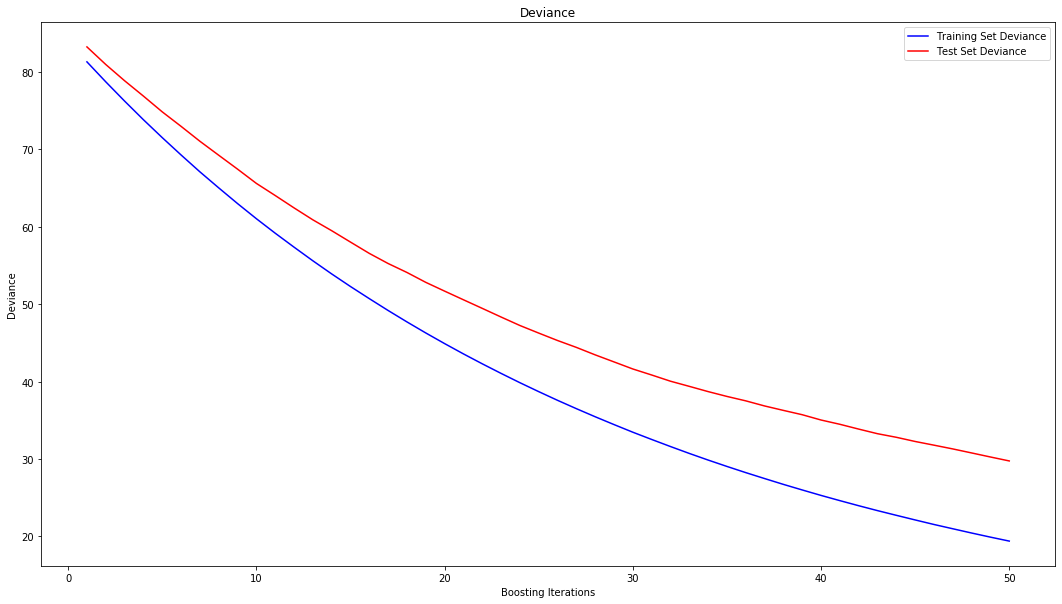

In [7]:
plt.figure(figsize=(40, 10))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')